# Extra 09 Unsupervised In Depth
**Workflow**: `data-notebook-refiner`
**Source**: Refactored from `007.비지도학습.ipynb`

---


In [1]:
from IPython.display import Image

## 비지도 학습의 개요

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다. 
이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 **입력값에 대한 목표치가 주어지지 않는다**.

- 차원 축소: PCA, LDA, SVD
- 군집화: KMeans Clustering, DBSCAN
- 군집화 평가

## 차원 축소

- feature의 갯수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 함.
- 계산 비용을 감소하는 효과
- 전반적인 데이터에 대한 이해도를 높이는 효과

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

### 데이터 로드 (iris 데이터)

In [3]:
iris = datasets.load_iris()

In [4]:
data = iris['data']

In [5]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
df = pd.DataFrame(data, columns=iris['feature_names'])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris['target']

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## PCA 차원축소

주성분 분석 (PCA) 는 선형 차원 축소 기법입니다. 매우 인기 있게 사용되는 차원 축소 기법중 하나입니다.

주요 특징중의 하나는 **분산(variance)을 최대한 보존**한다는 점입니다.

[PCA의 원리에 관련된 블로그글](https://excelsior-cjh.tistory.com/167)

- components에 1보다 작은 값을 넣으면, 분산을 기준으로 차원 축소
- components에 1보다 큰 값을 넣으면, 해당 값을 기준으로 feature를 축소

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [12]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [13]:
pca_data = pca.fit_transform(data_scaled)

In [14]:
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [15]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

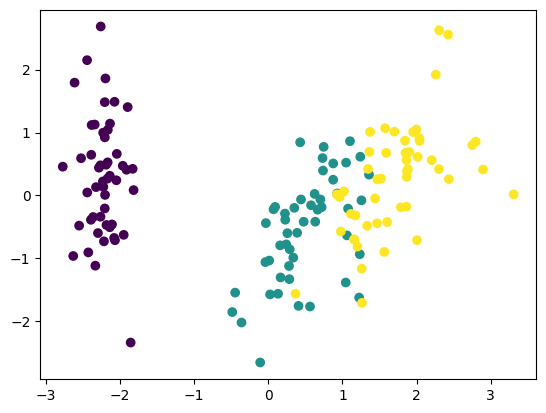

In [17]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

In [18]:
pca = PCA(n_components=0.99)

In [19]:
pca_data = pca.fit_transform(data_scaled)

In [20]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ]])

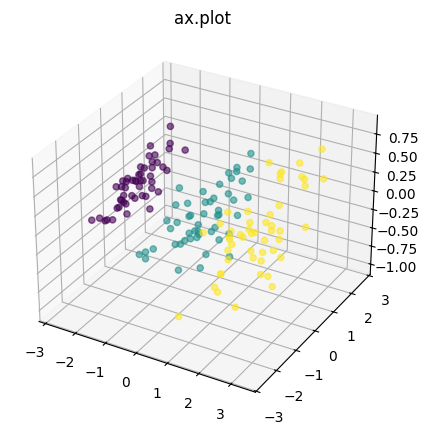

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title("ax.plot")
plt.show()

## LDA 차원 축소

LDA(Linear Discriminant Analysis): 선형 판별 분석법 (PCA와 유사)

- LDA는 클래스(Class) 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화 하는 방식으로 차원 축소합니다.

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [25]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [26]:
lda_data = lda.fit_transform(data_scaled, df['target'])

In [27]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

시각화

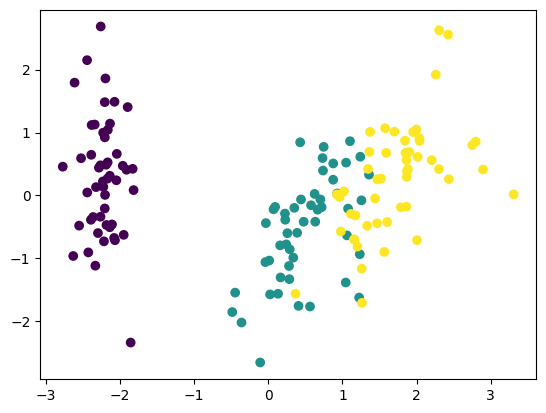

In [28]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])
plt.show()

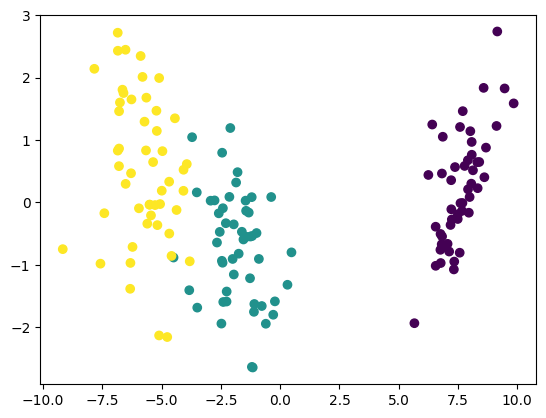

In [29]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])
plt.show()

### SVD (Singular Value Decomposition)

[위키문서](https://ko.wikipedia.org/wiki/%ED%8A%B9%EC%9D%B4%EA%B0%92_%EB%B6%84%ED%95%B4)

- 상품의 추천 시스템에도 활용되어지는 알고리즘 (추천시스템)
- 특이값 분해기법입니다. 
- PCA와 유사한 차원 축소 기법입니다. 
- scikit-learn 패키지에서는 truncated SVD (aka LSA)을 사용합니다.


In [30]:
from sklearn.decomposition import TruncatedSVD

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [33]:
svd = TruncatedSVD(n_components=2)

In [34]:
svd_data = svd.fit_transform(data_scaled)

시각화

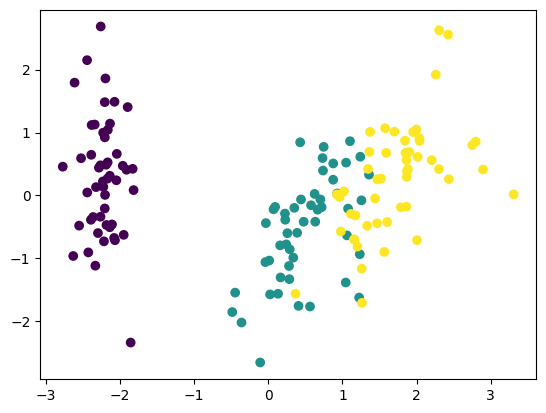

In [35]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])
plt.show()

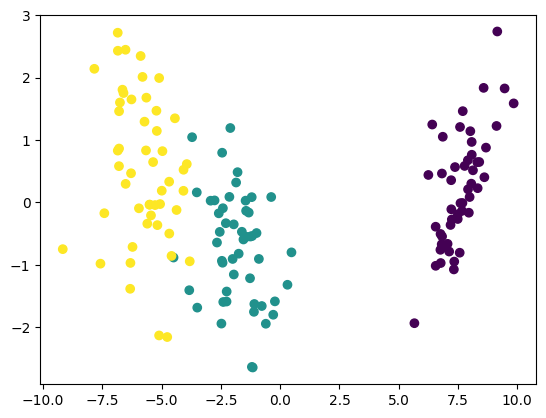

In [36]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])
plt.show()

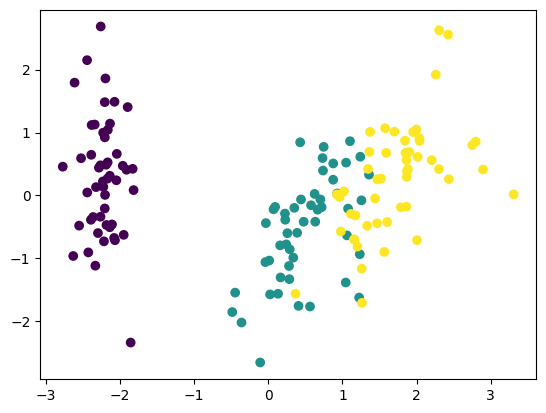

In [37]:
plt.scatter(svd_data[:, 0], svd_data[:, 1], c=df['target'])
plt.show()

## 군집화

### K-Means Clustering

[K-Means 알고리즘](https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

군집화에서 가장 대중적으로 사용되는 알고리즘입니다. centroid라는 중점을 기준으로 가장 가까운 포인트들을 선택하는 군집화 기법입니다.

**사용되는 예제**

- 스팸 문자 분류
- 뉴스 기사 분류

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=3)

In [40]:
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [41]:
cluster_data[:5]

array([[5.03132789, 0.14135063, 3.41251117],
       [5.08750645, 0.44763825, 3.38963991],
       [5.25229169, 0.4171091 , 3.56011415],
       [5.12704282, 0.52533799, 3.412319  ],
       [5.07638109, 0.18862662, 3.4603117 ]])

In [42]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [43]:
# list(df['target'])

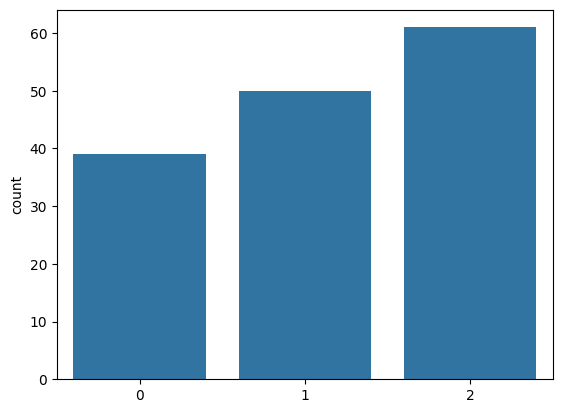

In [44]:
sns.countplot(x = kmeans.labels_)
plt.show()

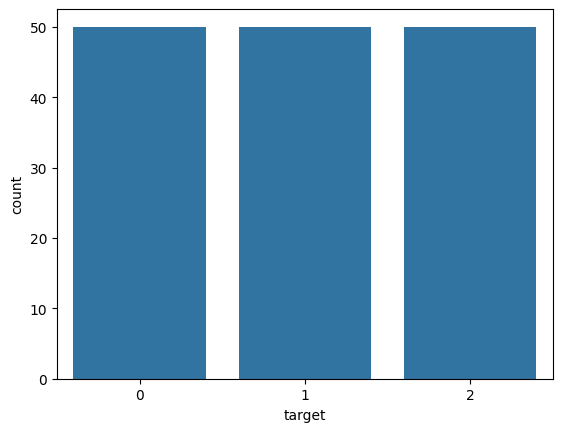

In [45]:
sns.countplot(x = df['target'])
plt.show()

In [46]:
kmeans

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


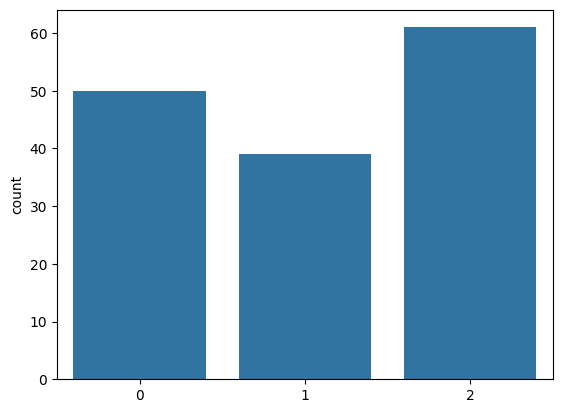

In [47]:
kmeans = KMeans(n_clusters=3, max_iter=500)
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])
sns.countplot(x = kmeans.labels_)
plt.show()

## DBSCAN (Density-based spatial clustering of applications with noise)

밀도 기반 클러스터링

- 밀도가 높은 부분을 클러스터링 하는 방식
- 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
- KMeans 에서는 n_cluster의 갯수를 반드시 지정해 주어야 하나, DBSCAN에서는 필요없음
- 기하학적인 clustering도 잘 찾아냄


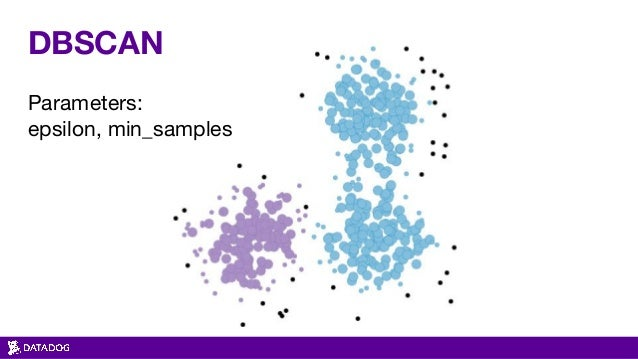

In [48]:
Image('https://image.slidesharecdn.com/pydatanyc2015-151119175854-lva1-app6891/95/pydata-nyc-2015-automatically-detecting-outliers-with-datadog-26-638.jpg')

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
dbscan = DBSCAN(eps=0.3, min_samples=2)

In [51]:
dbscan_data = dbscan.fit_predict(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [52]:
dbscan_data

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  2,
        3,  2,  4,  5, -1,  3,  6,  5, -1, -1, -1, -1,  7, -1,  5,  8,  4,
        9,  4, 10, -1, -1,  7,  5,  5, -1, -1,  7, -1,  4,  4,  4, -1,  8,
       -1,  2,  9,  4,  4,  4,  7,  4,  6,  4,  4,  4,  5, -1,  4, -1, 11,
       -1, 12, -1, 13, -1, 14, -1, -1, 15, -1, 16, 11, -1, -1, 12, -1, -1,
       -1, 17, -1, 13, 10, 17, -1, 10, 10, 18, -1, 14, -1, 18, -1, -1, -1,
       19, 12, 10, 16, 17, 20, 11, 17, 17, 20, 10, 15, 19, 10])

## 실루엣 스코어 (군집화 평가)

클러스터링의 품질을 정량적으로 평가해 주는 지표

- 1: 클러스터링의 품질이 좋다
- 0: 클러스터링의 품질이 안좋다 (클러스터링의 의미 없음)
- 음수: 잘못 분류됨

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [54]:
score = silhouette_score(data_scaled, kmeans.labels_)

In [55]:
score

0.4472199222829889

In [56]:
samples = silhouette_samples(data_scaled, kmeans.labels_)

In [57]:
samples[:5]

array([0.73288201, 0.57609965, 0.68096769, 0.6265351 , 0.72667458])

[api 참고(scikit-learn 공식 도큐먼트)](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [58]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

- 빨간 점선은 평균 실루엣 계수를 의미합니다.

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


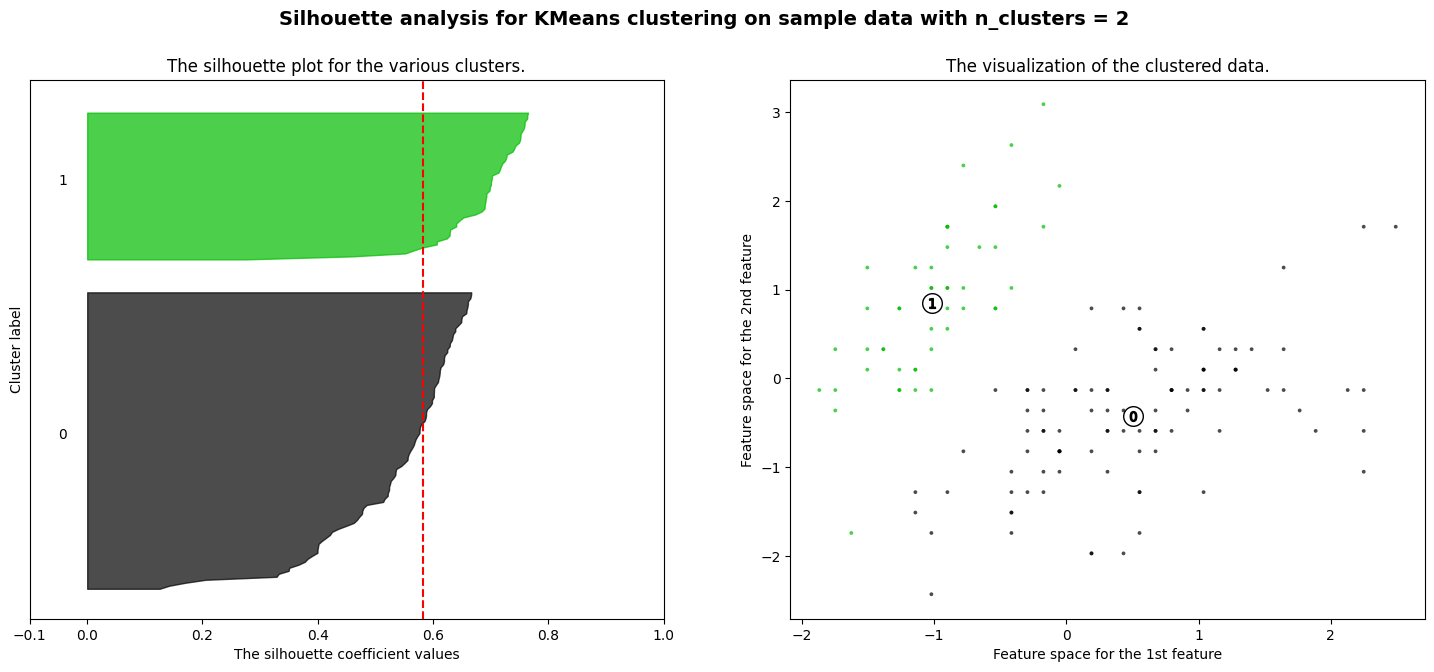

For n_clusters = 3 The average silhouette_score is : 0.4565352255831263


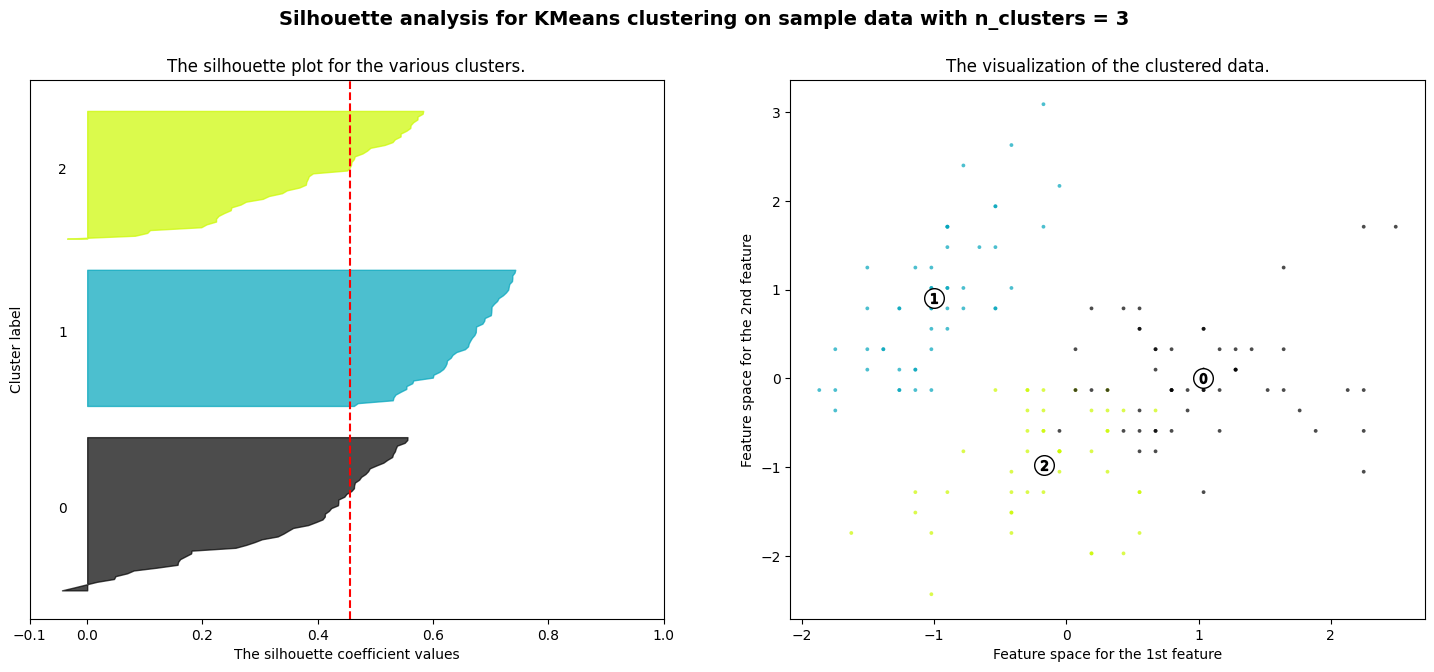

For n_clusters = 4 The average silhouette_score is : 0.3850454053045391


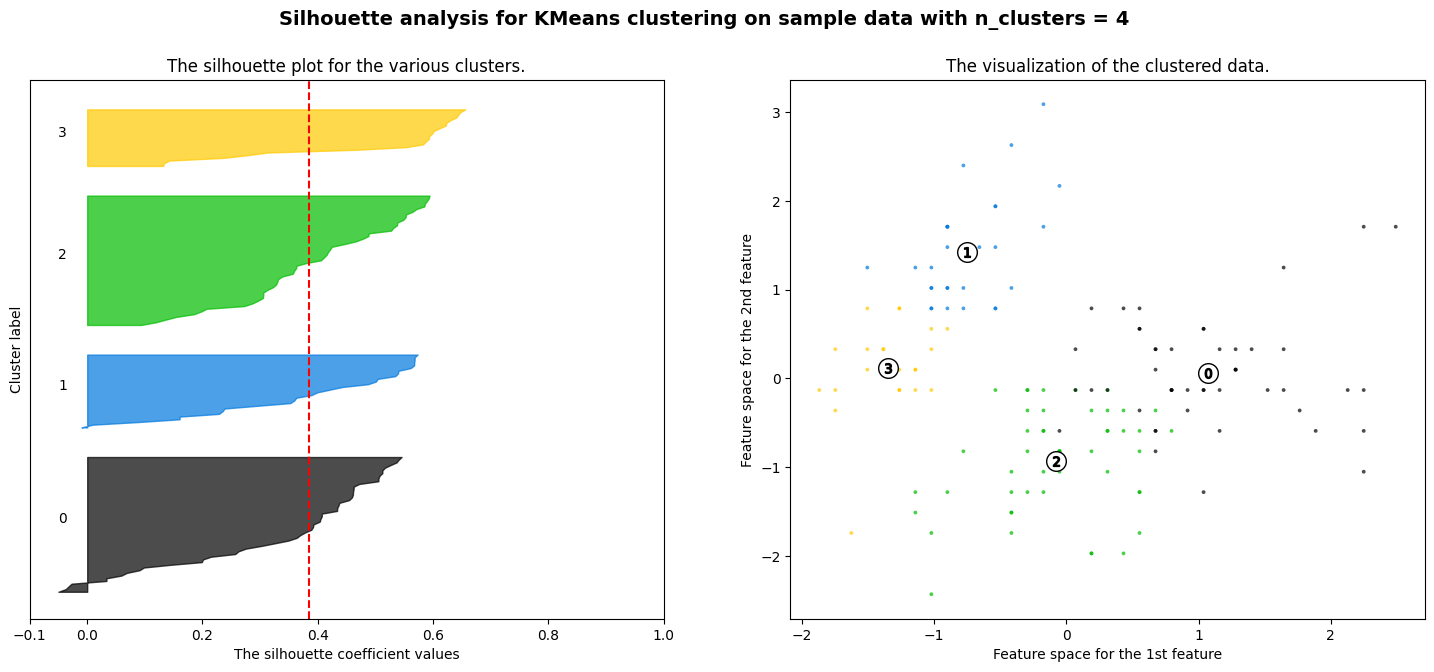

For n_clusters = 5 The average silhouette_score is : 0.34380827431664635


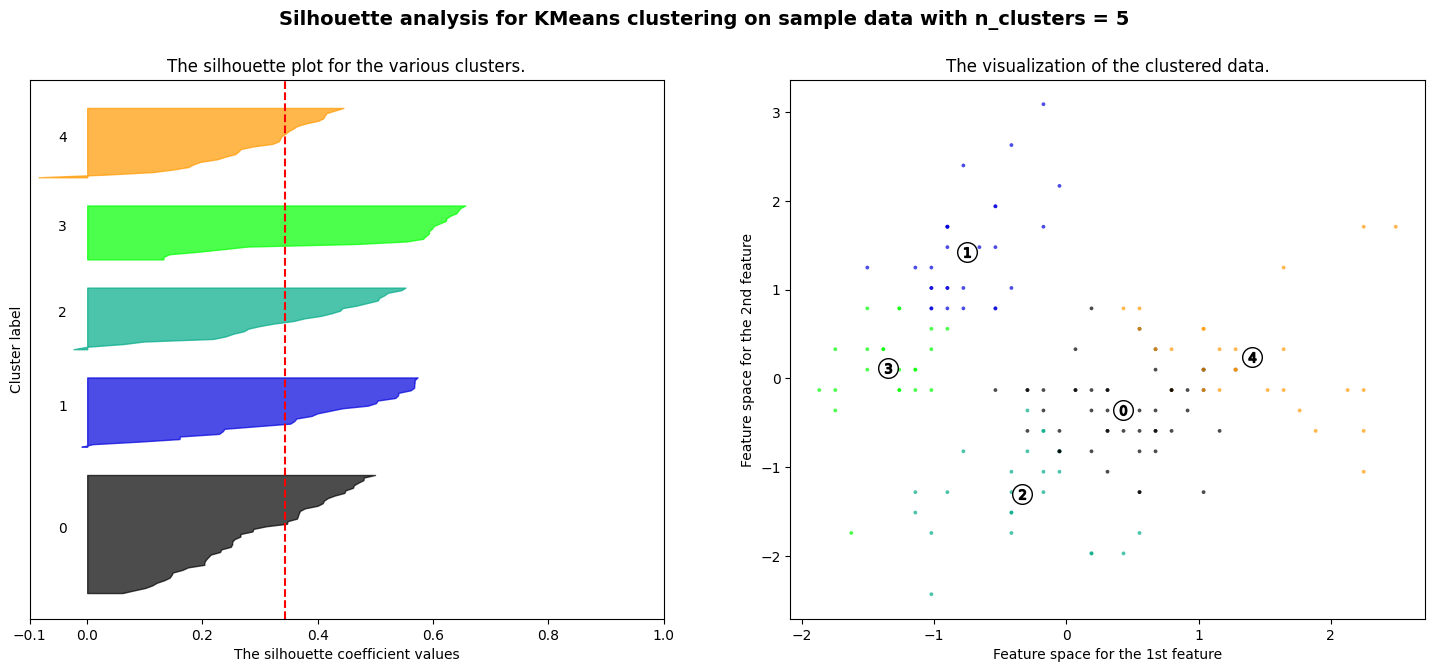

In [59]:
plot_silhouette(data_scaled, [2, 3, 4, 5])


---
## 📝 Key Takeaways & Insights
*   **What did we learn?**
    *   (여기에 핵심 배운 점을 기록하세요)
*   **Next Steps**:
    *   (다음 학습 단계)
